Markdown macros

$\newcommand{\I}{\mathrm{i}} 
\newcommand{\E}{\mathrm{e}} 
\newcommand{\D}{\mathop{}\!\mathrm{d}}
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
\newcommand{\braket}[1]{\langle{#1}\rangle}
\newcommand{\bm}[1]{\boldsymbol{#1}}$

# Imports

In [1]:
# numpy
import numpy as np

In [2]:
# matplotlib
import matplotlib
import matplotlib.pylab as plt

In [3]:
%matplotlib inline
from IPython.display import Image

In [4]:
# sympy
import sympy as sy
sy.init_printing(use_unicode = True)

# Rotation d'une barre inclinée

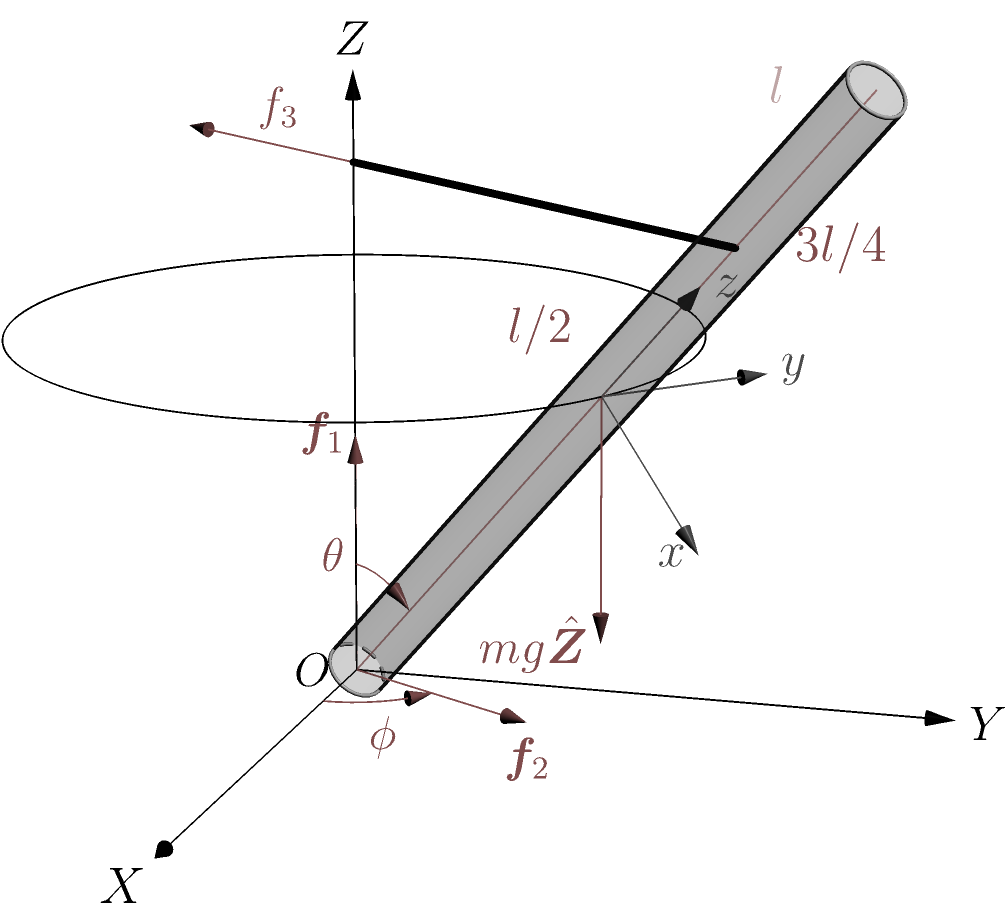

In [5]:
Image(filename='barre_z.png', width=300)

Une barre de masse $m$ et de longueur $l$ est fixée au point $O=(0,0,0)$ d'un repère fixe $(X,Y,Z)$. Elle est inclinée d'un angle $\theta=\mathrm{const.}$, tenue par une barre horizontale (parallèle au plan $XY$), et tourne autour de l'axe $Z$.

On note $\theta,\phi$ les angles des coordonnées sphériques. La barre tourne à vitesse angulaire constante $\dot\phi=\omega_0$.

## Cinématique
Le centre de masse se situe à une distance $l/2$ de l'origine $O$, ses coordonnées sphériques sont $(l/2,\theta,\phi)$. On note
$$\bm n = \cos\phi \hat{\bm X} + \sin\phi \hat{\bm Y}$$
la projection sur le plan $XY$ de la direction du centre de masse.

Les axes du repère mobile sont (voir figure):
\begin{align}
\hat{\bm x} &= \cos\theta \bm n - \sin\theta \hat{\bm Z} \\
\hat{\bm y} &= -\sin\theta \hat{\bm X} + \cos\theta \hat{\bm Y}\\
\hat{\bm z} &= \sin\theta \bm n + \cos\theta \hat{\bm Z}
\end{align}
La matrice de rotation du repère mobile par rapport au repère fixe est donc,
$$R(\theta,\phi) = \begin{pmatrix}
\cos\theta \cos\phi & -\sin\phi & \sin\theta \cos\phi \\
\cos\theta \sin\phi & \cos\phi & \sin\theta \sin\phi \\
-\sin\theta & 0 & \cos\theta \end{pmatrix}$$

Notez que la matrice de rotation peut se décomposer selon la formule
$$R(\theta,\phi) = R_Z(\phi)R_Y(\theta)$$

Le vecteur centre de masse est
$$\bm R = \frac{l}{2}(\sin\theta \bm n + \cos\theta \hat{\bm Z})$$
et le moment d'inertie (par rapport au centre de masse) est
$$I_x = I_y = I_l = \frac{ml^2}{12}$$
La vitesse angulaire est
$$\bm \omega = \dot\phi \hat{\bm Z} = \omega_0 \hat{\bm Z}$$
La vitesse du centre de masse est due à la rotation (constante):
$$\bm V = \bm \omega \times \bm R = \frac{l\omega_0}{2}\sin\theta \hat{\bm y}$$
(dans le repère mobile). L'accelération est
$$\dot{\bm V} =  -\frac{l\omega_0^2}{2}\sin\theta \bm n$$
(puisque $\dot{\hat{\bm y}}=-\omega_0\bm n$)

### Moment cinétique

In [6]:
# matrices de rotation

phi, theta, psi = sy.symbols("phi, theta, psi", real=True)

def R_x(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[1,  0, 0],
                  [0, c, -s],
                  [0, s,  c]])
def R_y(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[ c, 0, s],
                  [ 0, 1, 0],
                  [-s, 0, c]])

def R_z(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[c, -s, 0],
                  [s,  c, 0],
                  [0,  0, 1]])

def XYZ():
    return sy.Matrix([1,0,0]), sy.Matrix([0,1,0]), sy.Matrix([0,0,1])

La rotation de la barre est décrite par une rotation autour de $Y$ d'angle $\theta$ suivie d'une rotation autour de $Z$ d'angle $\phi$:

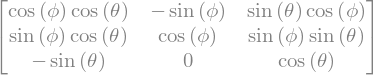

In [7]:
R = R_z(phi)*R_y(theta)
R

Le paramètres sont

In [8]:
m, g, l, omega_0 = sy.symbols("m, g, l, omega_0", real=True)

Les données cinétiques sont

In [9]:
# cinétique
X, Y, Z = XYZ()
n = sy.cos(phi)*X + sy.sin(phi)*Y
y = R*Y
omega = omega_0*Z
r = (l/2)*(sy.sin(theta)*n + sy.cos(theta)*Z)
V = omega.cross(r)
a = -(l/2)*omega_0**2 * sy.sin(theta)*n

Le point délicat est le calcul du moment cinétique $\bm L$
$$\bm L = m \bm R \times \bm V + I\bm \omega$$
et de sa dérivée par rapport au temps
$$\dot{\bm L} = m\bm R \times \dot{\bm V} + \bm\omega \times (I \bm\omega)$$
Le problème est qu'on connaît les variables cinétiques dans le repère fixe, mais on a l'expression du moment d'inertie dans le centre de masse:
$$I = \frac{ml^2}{12}\mathrm{diag}(1,1,0)$$
Pour reconcilier les deux on doit choisir le repère pour exprimer $\bm L$. Dans le cas présent, il convient de transformer $I$ dans le repère universel.

On transforme le tenseur d'inertie "centre de masse" en tenseur "fixe":
$$I_0 = RIR^T$$
à l'aide donc de la matrice de rotation.

L'autre possibilité est de travailler dans le repère mobile, comme on le montre à la fin du cahier.

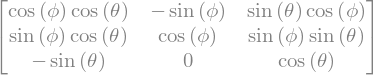

In [10]:
R

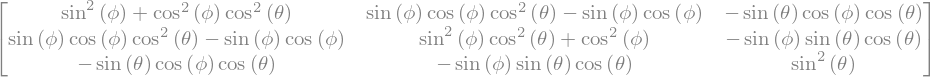

In [11]:
# tenseur I au repère fixe
RIR = R*sy.Matrix([[1,0,0],[0,1,0],[0,0,0]])*R.T
I_0 = (m*l**2/12)*RIR
RIR

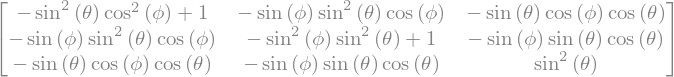

In [12]:
sy.expand(RIR.subs(sy.cos(theta)**2,1-sy.sin(theta)**2)).subs(sy.sin(phi)**2+sy.cos(phi)**2,1)

La partie centre de masse donne:
$$ m\bm R \times \dot{\bm V} = -\frac{m\omega_0^2l^2}{4}\sin\theta\cos\theta \hat{\bm y}$$
et la partie de rotation donne:
$$\bm \omega \times (I\bm \omega) = -\frac{m\omega_0^2l^2}{12}\sin\theta \cos\theta\hat{\bm y}$$
On a en définitive:
$$\dot{\bm L} = -\frac{m\omega_0^2l^2}{3}\sin\theta \cos\theta\hat{\bm y}$$

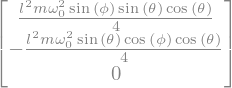

In [13]:

m*r.cross(a)

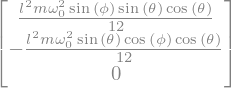

In [14]:
omega.cross(I_0*omega)

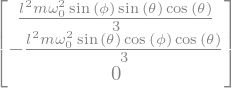

In [15]:
m*r.cross(a) + omega.cross(I_0*omega)

## Forces

La force totale (gravité et contraintes) est
$$\bm F = -mg \hat{\bm Z} + f_1 \hat{\bm Z} + f_2 \bm n - f_3 \bm n$$

In [16]:
f_1,f_2, f_3 = sy.symbols("f_1,f_2, f_3", real=True)

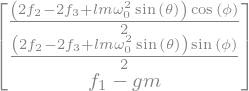

In [17]:
# force
F = -m*g*Z + f_1*Z + f_2*n - f_3*n
sy.simplify(F-m*a)

On obtient les équations pour $f_1$ et $f_2$ à partir de l'équation de Newton $\bm F = m \dot{\bm V}$:
$$f_1 = mg$$
et 
$$f_2 = f_3 - \frac{ml\omega_0^2}{2}\sin\theta$$

## Moment des forces

Le poids $mg$ et la corde $f_3$ exercent de moments:
$$\bm M = \frac{3l}{4}\hat{\bm z} \times (-\bm f_3) + \frac{l}{2}\hat{\bm z} \times (-mg)\hat{\bm Z}$$
ce qui donne:
$$\bm M = \frac{mgl}{2} \sin\theta \hat{\bm y} - \frac{3lf_3}{4} \cos\theta \hat{\bm y}$$
On se rappelle que dans le repère fixe on $\hat{\bm y} = -\sin\phi\hat{\bm X} + \cos\phi \hat{\bm Y}$.

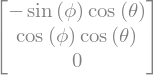

In [18]:
z = R*Z
z.cross(n)

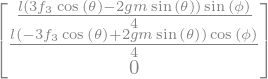

In [19]:
sy.simplify(-3*l*f_3/4 * z.cross(n) + l/2*(-m*g) * z.cross(Z))

### Équation d'Euler

L'équation d'Euler pour le moment cinétique est
$$\dot{\bm L} = \bm R \times (m\dot{\bm V}) + \bm \omega\times(I_0 \bm \omega) = \bm M$$
où on a utilisé que le terme d'accelération angulaire $\dot{\bm \omega}$ est nul. 

On obtient une équation pour la force $\bm f_3$ (les composantes $X$ et $Y$ de l'équation donnenet la même solution):
$$\frac{ml^2 \omega_0^2}{12} \cos\theta\sin\theta\sin\phi = \left(\frac{mgl}{2} \sin\theta -  \frac{3l^2}{4} f_3\cos\theta\right)\sin\phi$$
ou en dégageant $f_3$:
$$f_3 = \frac{2mg}{3} \tan\theta + \frac{4m\omega_0^2l^2}{9}\sin\theta$$
Les autres forces sont
$$f_1 = mg$$
et
$$f_2 = \frac{2mg}{3} \tan\theta - \frac{m\omega_0^2l^2}{18}\sin\theta$$

## Calcul de $\bm L$ en $xyz$

Il est aussi possible de faire le calcul de l'équation d'Euler dans le repère mobile. Pour cela il faut exprimer la vitesse angulaire dans le repère mobile

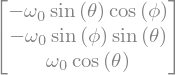

In [20]:
O = R_z(phi)*R_y(-theta)*omega
O

Le point délicat est le calcul du moment cinétique $\bm L$. La méthode la plus directe est de le calculer dans le repère mobile.

La vitesse angulaire dans $xyz$ est
$$\bm \Omega = R_z(\phi)R_y(-\theta)\bm \omega = \omega_0 \begin{pmatrix} -\sin\theta \cos\phi \\ -\sin\theta \sin\phi \\ \cos \theta\end{pmatrix}$$
Le moment angulare est
$$\bm L = m\bm R \times \bm V + I\bm \Omega$$
et sa dérivée par rapport au temps
$$\dot{\bm L} = m\bm R \times \dot{\bm V} + \bm\Omega \times (I \bm\Omega)$$
Le moment d'inertie (centre de masse)
$$I_O = \frac{ml^2}{12}\mathrm{diag}(1,1,0)$$
La partie centre de masse donne:
$$ m\bm R \times \dot{\bm V} = -\frac{m\omega_0^2l^2}{4}\sin\theta\cos\theta \hat{\bm y}$$
et la partie de rotation donne:
$$\bm \Omega \times (I\bm \Omega) = -\frac{m\omega_0^2l^2}{12}\sin\theta \cos\theta\hat{\bm y}$$
On a en définitive:
$$\dot{\bm L} = -\frac{m\omega_0^2l^2}{3}\sin\theta \cos\theta\hat{\bm y}$$

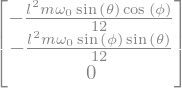

In [21]:
# inertie
I_l = (m*l**2/12)*sy.Matrix([[1,0,0],[0,1,0],[0,0,0]])
I_l*O

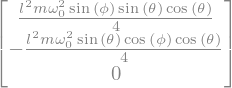

In [22]:
L_g = m*(r.cross(a))
L_g

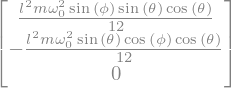

In [23]:
L_o = O.cross(I_l*O)
L_o

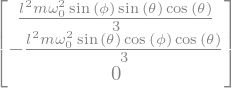

In [24]:
L_g + L_o

On obtient bien le résultat:
$$\dot{\bm L} = -\frac{m\omega_0^2l^2}{3}\sin\theta \cos\theta\hat{\bm y}$$